In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importing the dataset and splitting it into training and test set

((trainX, trainY), (testX, testY)) = mnist.load_data()

In [3]:
#since it is Deep Neural network implementation we need to flatten the image
#to apply it to a dense layer
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

#scaling the data to be in range of (0, 1)
trainX = trainX.astype("float32")/255.0
testX = testX.astype("float32")/255.0

In [4]:
#converting the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [7]:
#Defining a 784-256-128-10 model using keras

model = Sequential()
model.add(Dense(256, input_shape = (784,), activation = "sigmoid"))
model.add(Dense(128, activation = "sigmoid"))
model.add(Dense(10, activation = "softmax"))

In [10]:
#Setting the learning rate to 0.01, compiling and fitting the model
sgd = SGD(0.01)
model.compile(loss = "categorical_crossentropy", optimizer = sgd, metrics = ["accuracy"])

H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs = 100, batch_size = 128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 34us/sample - loss: 2.2721 - acc: 0.2079 - val_loss: 2.2347 - val_acc: 0.2819
Epoch 2/100
60000/60000 [==============================] - 1s 18us/sample - loss: 2.2006 - acc: 0.3834 - val_loss: 2.1578 - val_acc: 0.4599
Epoch 3/100
60000/60000 [==============================] - 1s 18us/sample - loss: 2.1108 - acc: 0.4865 - val_loss: 2.0482 - val_acc: 0.4988
Epoch 4/100
60000/60000 [==============================] - 1s 18us/sample - loss: 1.9804 - acc: 0.5451 - val_loss: 1.8907 - val_acc: 0.5316
Epoch 5/100
60000/60000 [==============================] - 1s 19us/sample - loss: 1.8013 - acc: 0.5933 - val_loss: 1.6877 - val_acc: 0.6502
Epoch 6/100
60000/60000 [==============================] - 1s 18us/sample - loss: 1.5918 - acc: 0.6527 - val_loss: 1.4730 - val_acc: 0.6719
Epoch 7/100
60000/60000 [==============================] - 1s 18us/sample - loss: 1.3870 - acc: 0.7006 - val_l

60000/60000 [==============================] - 1s 20us/sample - loss: 0.3202 - acc: 0.9084 - val_loss: 0.3071 - val_acc: 0.9107
Epoch 58/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3185 - acc: 0.9086 - val_loss: 0.3053 - val_acc: 0.9106
Epoch 59/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3169 - acc: 0.9089 - val_loss: 0.3040 - val_acc: 0.9121
Epoch 60/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3153 - acc: 0.9091 - val_loss: 0.3033 - val_acc: 0.9127
Epoch 61/100
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3137 - acc: 0.9102 - val_loss: 0.3013 - val_acc: 0.9126
Epoch 62/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3121 - acc: 0.9101 - val_loss: 0.3001 - val_acc: 0.9128
Epoch 63/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3107 - acc: 0.9104 - val_loss: 0.2988 - val_acc: 0.9128
Epoch 64/100
60000/60000 [

In [11]:
#predictions
predictions = model.predict(testX, batch_size = 128)
print((classification_report(testY.argmax(axis = 1), predictions.argmax(axis = 1), target_names = [str(x) for x in lb.classes_])))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.91      0.90      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.90      0.87      0.88       892
           6       0.93      0.94      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.90      0.89       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



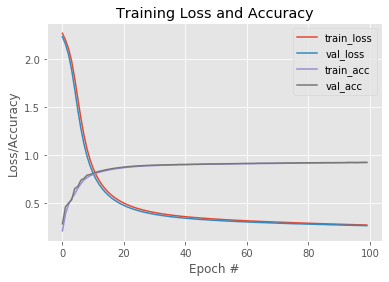

In [24]:
#plotting
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label = "train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label = "train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label = "val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel ("Loss/Accuracy")
plt.legend()
